In [27]:
# Importing all the required libraries

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # to plot the figures 
from sklearn.model_selection import train_test_split # to split the data into train and test

# Importing the classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, auc, confusion_matrix


In [2]:
data = pd.read_csv("dataset_phishing.csv")
data.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [3]:
data.describe() 

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

In [4]:
data.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## Data Visualization

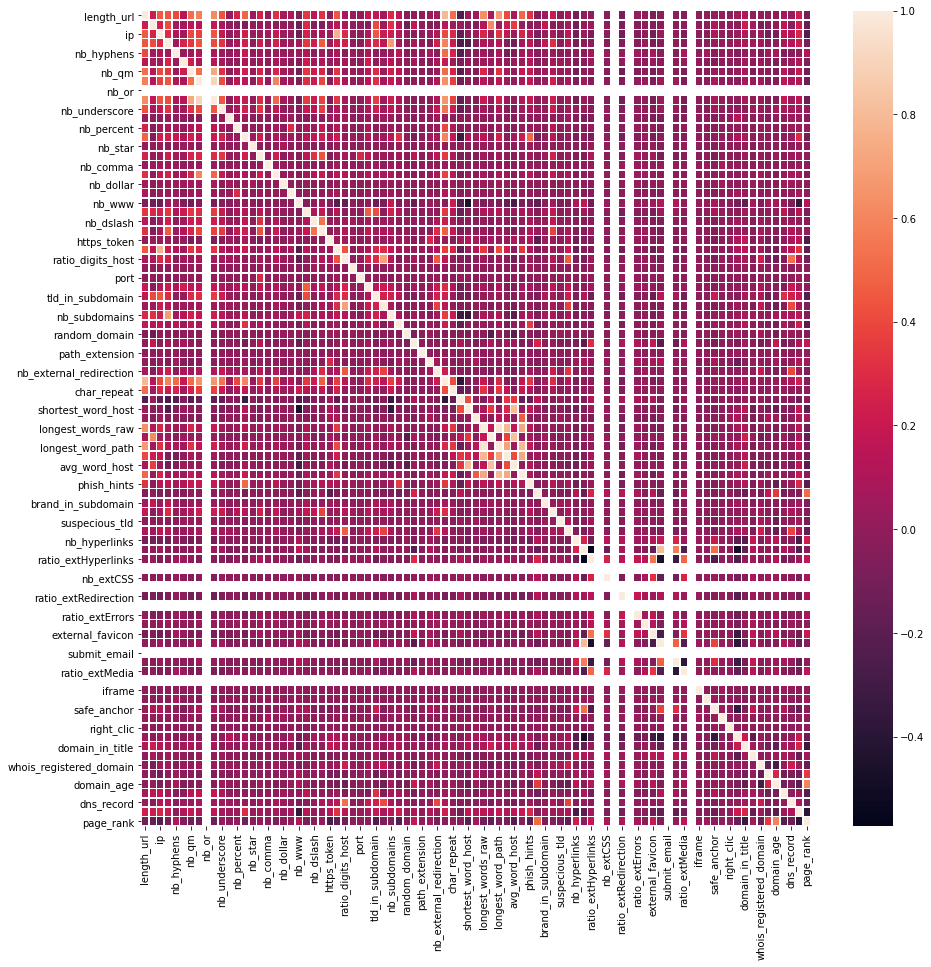

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)
plt.show()

In [7]:
legitimate_data = data[data['status']=='legitimate']
phishing_data = data[data['status']=="phishing"]

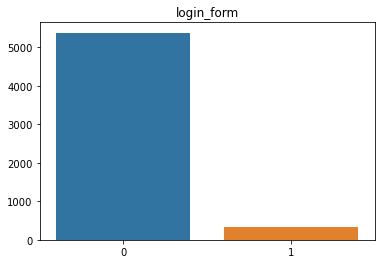

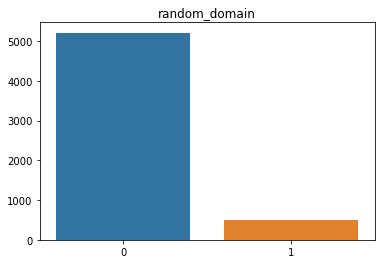

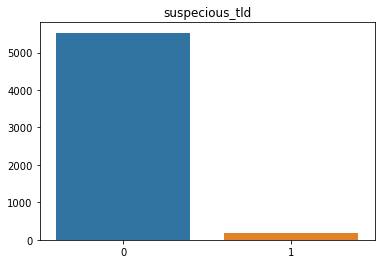

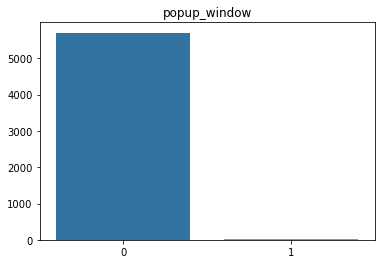

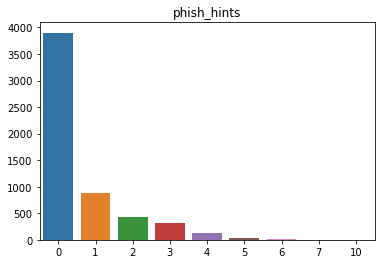

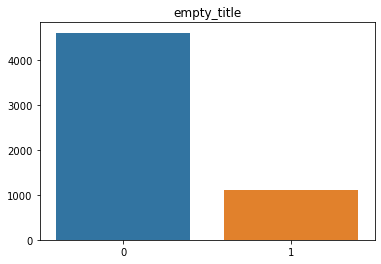

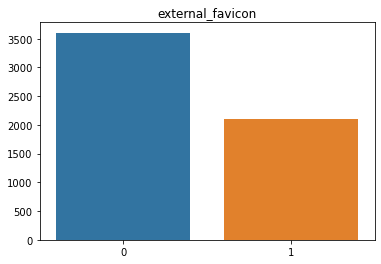

In [8]:
for col in ['login_form', 'random_domain', 'suspecious_tld', 'popup_window', 'phish_hints', 'empty_title', 'external_favicon']:
    sns.barplot(x = phishing_data[col].value_counts().index,
            y = phishing_data[col].value_counts().values)

    plt.title(col)
    plt.show()

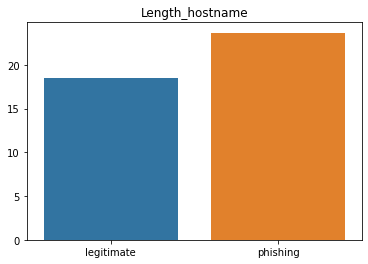

In [9]:
lengths = {
    "legitimate": np.mean(legitimate_data['length_hostname']),
    "phishing": np.mean(phishing_data['length_hostname'])
}

sns.barplot(x = list(lengths.keys()),
            y = list(lengths.values()))

plt.title("Length_hostname")
plt.show()

### Therefore url's can be differentiated on the basis of the length of the hostname.

## Data Splitting

In [10]:
Y = data['status']
X = data.drop("status", axis = 1)

In [11]:
# encoding the target variable
Y = Y.map({'legitimate':0,'phishing':1})

In [12]:
# mentioning the stratify field to get the data balance while splitting 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=data['status']) 

In [22]:
x_train.shape, x_test.shape
y_train

2377    0
1452    0
7027    0
7751    1
8359    0
       ..
8075    1
4304    1
7797    0
2594    1
7345    0
Name: status, Length: 8001, dtype: int64

In [14]:
# considering only numerical features
numerical_features = [col for col in x_train.columns if data[col].dtype!="O"]
x_train = x_train[numerical_features]
x_test = x_test[numerical_features]

In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
feature_importances = random_forest.feature_importances_

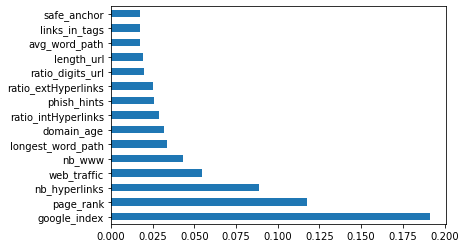

In [17]:
ranked_features=pd.Series(feature_importances,index=x_train.columns)
ranked_features.nlargest(15).plot(kind='barh')# considering top "15" columns based on their feature importances

### The above graph shows the importance of different models

In [23]:
col =['google_index','page_rank','nb_hyperlinks','domain_age','whois_registered_domain']#columns included
x_train[col]

google_index  page_rank  nb_hyperlinks  domain_age  \
2377             1          4            170        3075   
1452             0          2            150        7199   
7027             0          4            107        7689   
7751             1          1              0        4519   
8359             0          1             86        7991   
...            ...        ...            ...         ...   
8075             1          0              0        5055   
4304             1          0              6        6362   
7797             0          3             50        3153   
2594             1          0              6        5088   
7345             0          5            153        8047   

      whois_registered_domain  
2377                        0  
1452                        1  
7027                        0  
7751                        0  
8359                        0  
...                       ...  
8075                        0  
4304                        0  
7797                        0  
2594                        0  
7345                        0  

[8001 rows x 5 columns]

In [19]:
dr = DecisionTreeClassifier()
dr.fit(x_train[col], y_train)

DecisionTreeClassifier()

In [28]:
ypred1 = dr.predict(x_test[col])
print(confusion_matrix(y_test, ypred1))
print(classification_report(y_test, ypred1))

[[1574  140]
 [ 144 1571]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1714
           1       0.92      0.92      0.92      1715

    accuracy                           0.92      3429
   macro avg       0.92      0.92      0.92      3429
weighted avg       0.92      0.92      0.92      3429



## Therefore, the model predicted the phishing webpage with an accuracy of 92%